In [1]:
import numpy as np
import matplotlib.pyplot as plt


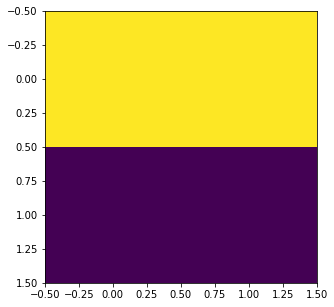

In [2]:
i1 = np.array([np.array([200,200]),np.array([0,0])]) # HORIZONTAL
i2 = np.array([np.array([200,0]),np.array([200,0])]) # vertical
i3 = np.array([np.array([200,0]),np.array([0,200])]) #diagonal
plt.figure(figsize=(5,5))
plt.imshow(i1)

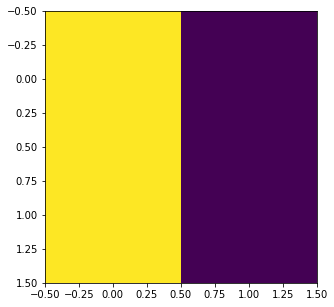

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(i2)

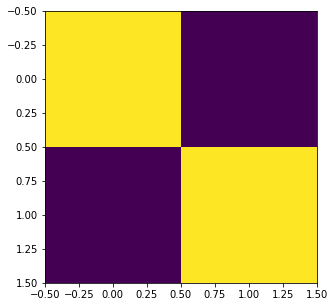

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(i3)

In [5]:
kernels_h =np.array([np.array([2,2]),np.array([-2,-2])])
kernels_v=np.array([np.array([2,-2]),np.array([2,-2])])
kernels_d=np.array([np.array([2,-2]),np.array([-2,2])])
#filters

In [6]:
def applyFilter(img, kernel):
  result = np.sum(np.multiply(img, kernel))
  return result
isFound = lambda val: ' detected' if val>0 else ' not detected'


In [8]:
kernels = [kernels_h, kernels_v, kernels_d]
images = [i1, i2, i3]

for count, img in enumerate(images):
  print('Image number ' + str(count+1))
  for countdracula, kernel in enumerate(kernels):
    print('Kernel number ' + str(countdracula+1))
    print(isFound( applyFilter(img, kernel) ))


    
  

Image number 1
Kernel number 1
 detected
Kernel number 2
 not detected
Kernel number 3
 not detected
Image number 2
Kernel number 1
 not detected
Kernel number 2
 detected
Kernel number 3
 not detected
Image number 3
Kernel number 1
 not detected
Kernel number 2
 not detected
Kernel number 3
 detected


1234.png  sample_data


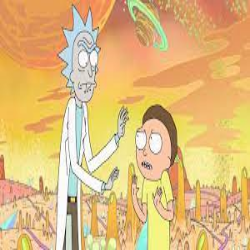

In [13]:
import cv2
from google.colab.patches import cv2_imshow
!ls
data = cv2.imread('1234.png')
data = cv2.resize(data, (250,250))
cv2_imshow(data)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
# VGG16 is an OBJECT DETECTION and IMAGE CLASSIFICATION algorithm for colored images!

In [17]:
model = VGG16()
# ML-> we multiplied, inputs to weights
# in CV, input=image, weights = kernel/filter 
# y = mx+c => y = image * kernel + bias 
kernels, biases = model.layers[1].get_weights()

553467904/553467096 [==============================] - 3s 0us/step


In [18]:
filtermin, filtermax = kernels.min(), kernels.max()
normfilters = (kernels- filtermin) / (filtermax -  filtermin)  # (x-min)/(max-min)
filtermin

-0.67140007

In [19]:
filtermax

0.6085159

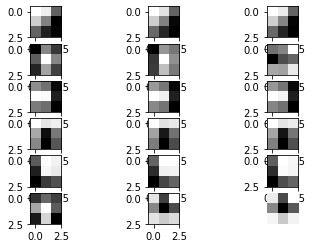

In [21]:

n_filters_rows, ix = 6, 1
n_filters_col = 3
# 18 filters-> 6 X 3
for i in range(n_filters_rows):
  kernel = kernels[:,:,:,i]
  for j in range(n_filters_col):
    ax = plt.subplot(n_filters_rows, n_filters_col, ix)
    plt.imshow(kernel[:,:,j], cmap='gray')
    ix = ix+1

plt.axis('off')
plt.show()

In [23]:
kernels.shape

(3, 3, 3, 64)

In [24]:
# let's find out how many filters does this VGG network has

# FILTERS-> CONVOLUTIONAL LAYER

for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  kernels, biases = layer.get_weights()
  print(layer.name)
  print(kernels.shape)

block1_conv1
(3, 3, 3, 64)
block1_conv2
(3, 3, 64, 64)
block2_conv1
(3, 3, 64, 128)
block2_conv2
(3, 3, 128, 128)
block3_conv1
(3, 3, 128, 256)
block3_conv2
(3, 3, 256, 256)
block3_conv3
(3, 3, 256, 256)
block4_conv1
(3, 3, 256, 512)
block4_conv2
(3, 3, 512, 512)
block4_conv3
(3, 3, 512, 512)
block5_conv1
(3, 3, 512, 512)
block5_conv2
(3, 3, 512, 512)
block5_conv3
(3, 3, 512, 512)
